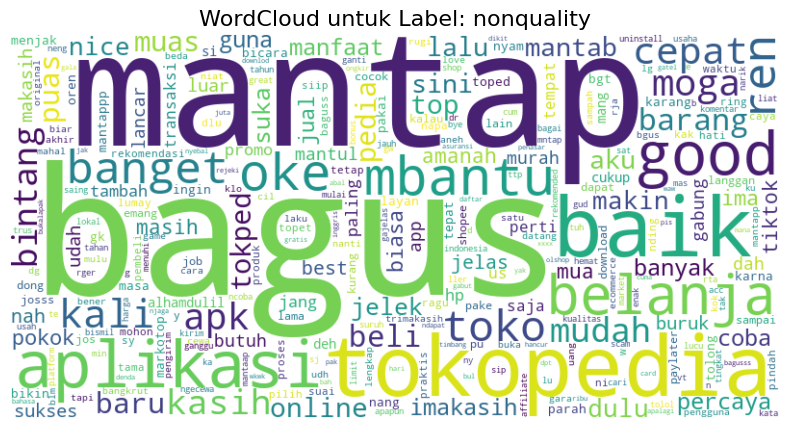

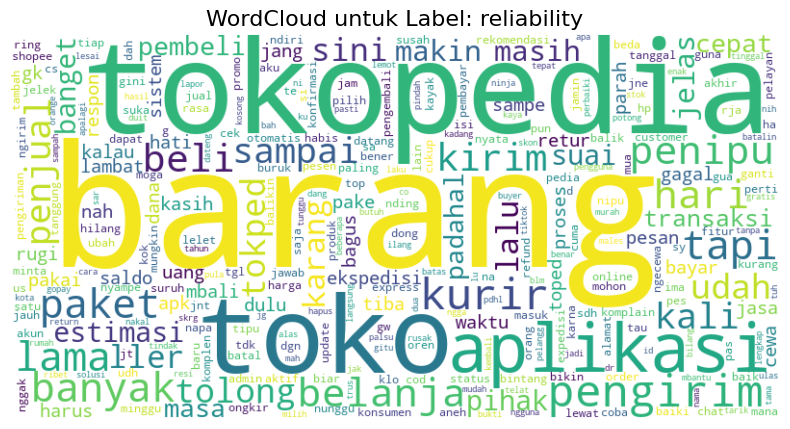

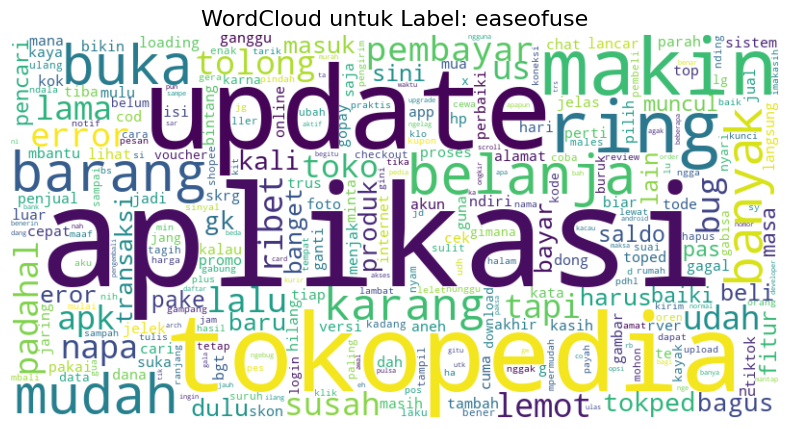

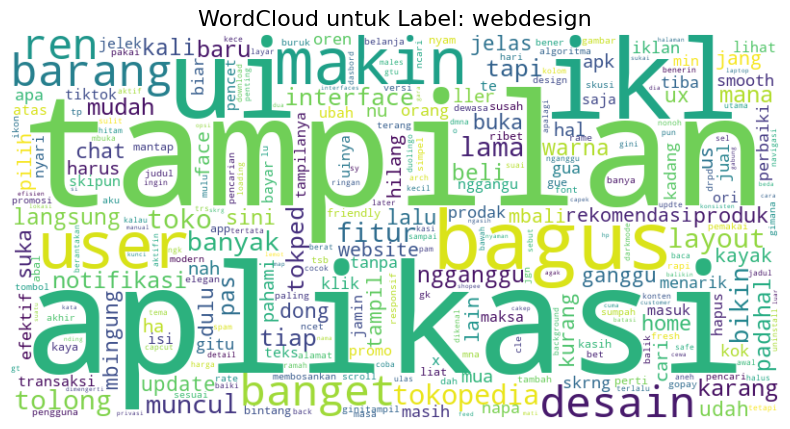

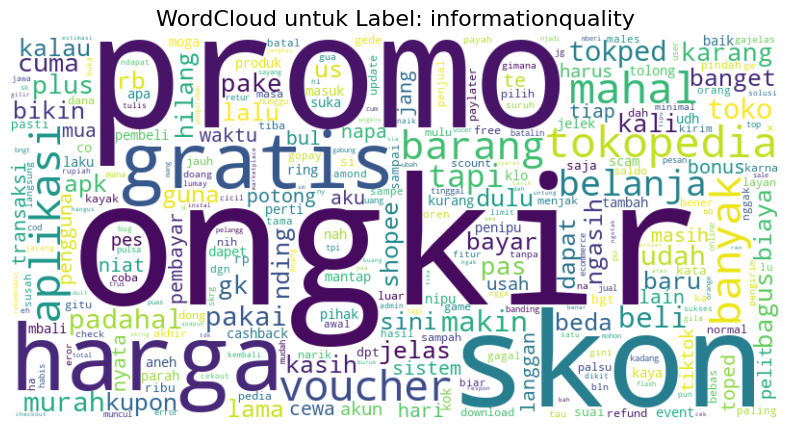

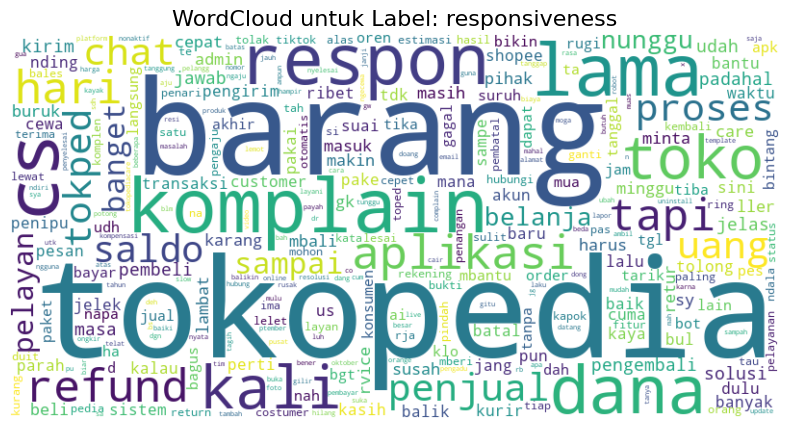

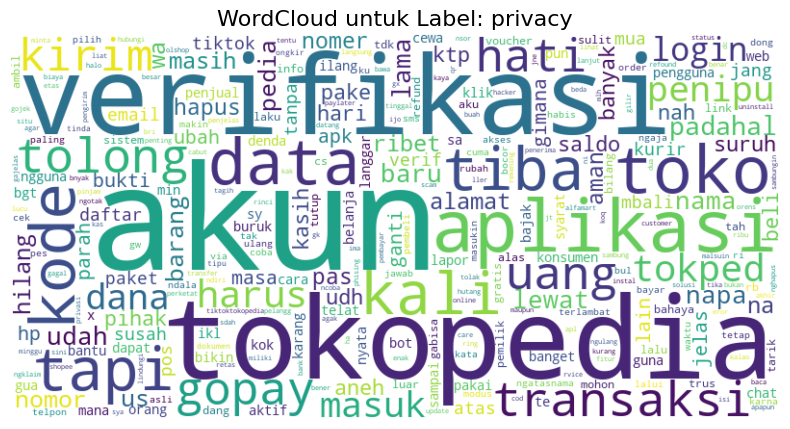

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re

# Step 0: Baca dataset
df = pd.read_csv("5000_cleaned_combined3.csv")

# Pastikan kolom 'cleaned_content' dan 'label' ada
assert 'cleaned_content' in df.columns, "Kolom 'cleaned_content' tidak ditemukan"
assert 'label' in df.columns, "Kolom 'label' tidak ditemukan"

# Step 1: Stopwords
custom_stopwords = {
    "dan", "atau", "di", "ke", "dengan", "yang", "ini", "itu", "ada", "saya", "anda",
    "kami", "mereka", "tidak", "ga", "gak", "nya", "yg", "bisa", "mau", "juga", "sama",
    "buat", "untuk", "dari", "pada", "sebagai", "lebih", "sih", "aja", "kalo", "soal",
    "ok", "lagi", "ya", "sudah", "sangat", "ma"
}
stopwords = set(STOPWORDS) | custom_stopwords

# Step 2: Loop untuk setiap label
labels = df['label'].unique()

for label in labels:
    # Filter data sesuai label
    subset = df[df['label'] == label]

    # Gabungkan teks dari label ini
    text = " ".join(subset['cleaned_content'].astype(str)).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenisasi dan buang stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]

    # Hitung frekuensi
    word_freq = Counter(filtered_words)

    # Buat WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=300,
        stopwords=stopwords,
        collocations=False
    ).generate_from_frequencies(word_freq)

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud untuk Label: {label}", fontsize=16)
    plt.show()
